# Variable importance measures

In [20]:
import pandas as pd
import numpy as np
import sys
import os
import os.path
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

In [3]:
sys.path.append('..')
from utils.kaggle import get_global_parameters, calc_contest_metric

In [4]:
global_parms = get_global_parameters()
DATA_DIR = os.path.join(global_parms['PROJ_DIR'],'data')

## Retrieve sample of data for anlaysis

In [5]:
train = pd.read_pickle(os.path.join(DATA_DIR,'interim','train_reduced.pkl')).sample(frac=0.1, random_state=13)
train.shape

(59054, 434)

In [6]:
predictors = train.drop(['isFraud','TransactionID'], axis='columns').copy()
predictors.shape

(59054, 432)

In [7]:
char_var = [col for col in predictors.columns if predictors[col].dtype.name == 'object']
num_var = [col for col in predictors.columns if predictors[col].dtype.name != 'object']

In [13]:
predictors[char_var] = predictors[char_var].fillna('__NA__')
predictors[num_var] = predictors[num_var].fillna(-1)

In [14]:
response = train['isFraud'].copy()
response.shape

(59054,)

In [15]:
rf = RandomForestClassifier()

In [16]:
rf.fit(predictors[num_var],response)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [18]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [26]:
#Print the feature ranking
print("Feature ranking:")

for f in range(predictors[num_var].shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 0 (0.034841)
2. feature 1 (0.029240)
3. feature 2 (0.028391)
4. feature 3 (0.025111)
5. feature 6 (0.022023)
6. feature 22 (0.018959)
7. feature 10 (0.016554)
8. feature 313 (0.014576)
9. feature 5 (0.014380)
10. feature 21 (0.013935)
11. feature 239 (0.013584)
12. feature 23 (0.012059)
13. feature 345 (0.010313)
14. feature 15 (0.010075)
15. feature 27 (0.009783)
16. feature 321 (0.009525)
17. feature 38 (0.009428)
18. feature 8 (0.009044)
19. feature 11 (0.008988)
20. feature 379 (0.008395)
21. feature 25 (0.008385)
22. feature 20 (0.007959)
23. feature 355 (0.007851)
24. feature 295 (0.007804)
25. feature 24 (0.007725)
26. feature 394 (0.007692)
27. feature 346 (0.007512)
28. feature 33 (0.007393)
29. feature 311 (0.007383)
30. feature 301 (0.007080)
31. feature 251 (0.006850)
32. feature 350 (0.006745)
33. feature 19 (0.006728)
34. feature 302 (0.006635)
35. feature 348 (0.006485)
36. feature 165 (0.006437)
37. feature 352 (0.006310)
38. feature 166 (0.0

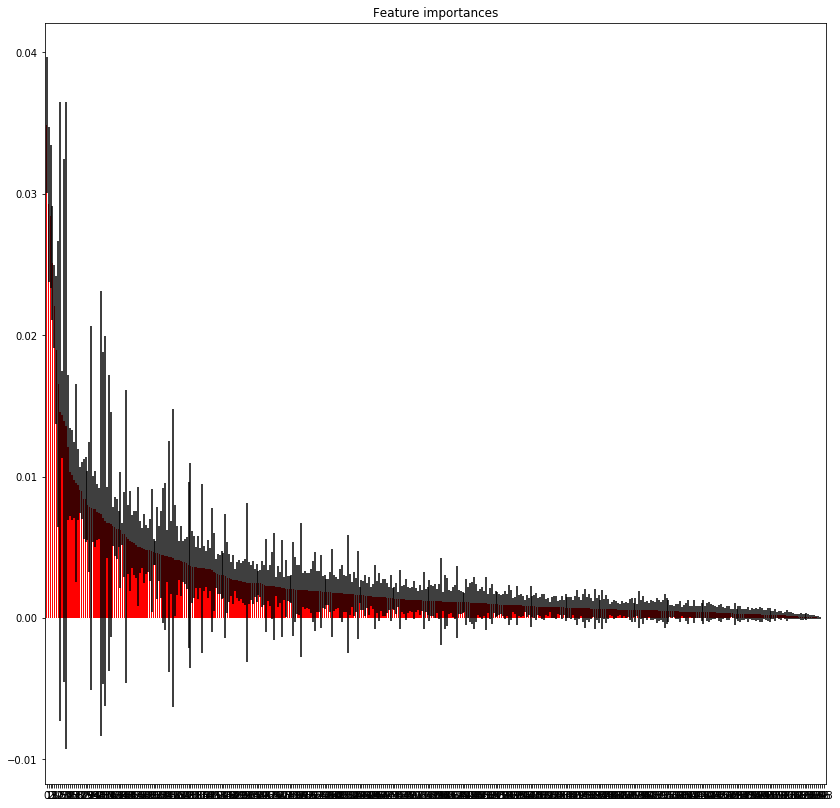

In [30]:
# Plot the feature importances of the forest
plt.figure(figsize=(14,14))
plt.title("Feature importances")
plt.bar(range(predictors[num_var].shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(predictors[num_var].shape[1]), indices)
plt.xlim([-1, predictors[num_var].shape[1]])
plt.show()